In [1]:
import torch
import torch.nn.functional as F
from torch import nn, Tensor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mask = np.load('./saved_models/dynamask/saliency_0.npz')['arr_0']

In [3]:
mask= mask[0,0, :,:]
mask.shape

(207, 12)

In [4]:
def normalize_tensor(data):
    min_val = data.min()
    max_val = data.max()
    normalized_data = (data - min_val) / (max_val - min_val)
    # X_scaled = normalized_data * (max_val - min_val) + min_val

    return normalized_data

In [5]:
temp= normalize_tensor(mask)

In [12]:
import matplotlib.pyplot as plt
def saliency(heatmap):
    # cmap = plt.cm.colors.ListedColormap(['lightpink', '#00CCFF'])
    # bounds = [0, 0.6, 1]
    # norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    plt.close('all')
    fig = plt.figure(figsize=(9, 7))
    a = plt.imshow(heatmap, cmap="Greens", aspect='auto', interpolation='nearest')
    _ = plt.xlabel("time steps")
    _ = plt.ylabel("nodes")
    _ = plt.tight_layout()
    plt.colorbar()
    
    # cbar = plt.colorbar(a, ticks=[0.25, 0.75])
    # cbar.set_ticklabels(['False', 'True'])

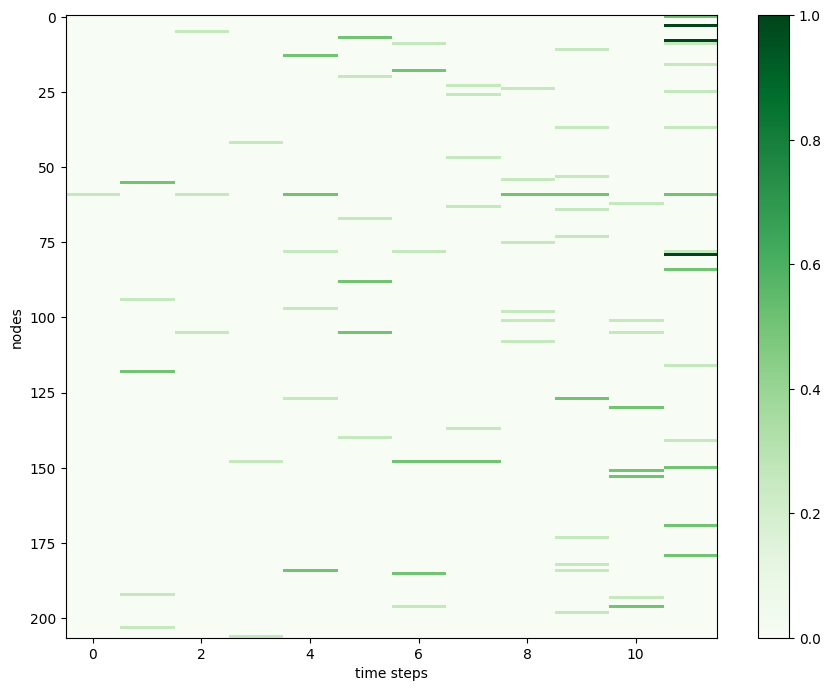

In [13]:
saliency(temp)

In [14]:
import matplotlib.pyplot as plt
def saliency(heatmap):
    cmap = plt.cm.colors.ListedColormap(['lightpink', '#00CCFF'])
    bounds = [0, 0.5, 1]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
    plt.close('all')
    fig = plt.figure(figsize=(9, 7))
    a = plt.imshow(heatmap, cmap=cmap, aspect='auto', norm=norm, interpolation='nearest')
    _ = plt.xlabel("time steps")
    _ = plt.ylabel("nodes")
    _ = plt.tight_layout()
    cbar = plt.colorbar(a, ticks=[0.25, 0.75])
    cbar.set_ticklabels(['False', 'True'])

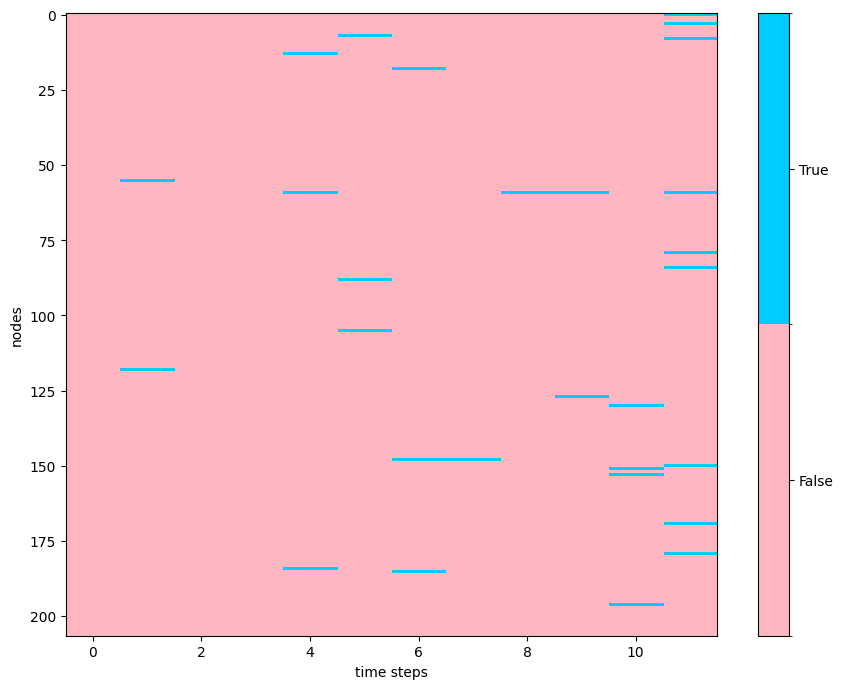

In [15]:
saliency(temp)